## Clasificación con máquina de vectores de soporte y redes de neuronas
### **Nombres:**  Ponce Proaño Miguel Alejandro 
### **Asignatura:**  Aprendizaje Automático
### **Actividad:** Nro. 2 - mia05_t9_act

## Librerías utilizadas

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import OneHotEncoder,StandardScaler

* Se crean las constantes que serán utilizadas para el desarrollo del ejercicio. Por ejemplo, el valor de la semilla aleatoria y otras variables.

In [2]:
semilla_aleatoria = 1234
umbral_categoria = 10
umbral_correlacion = 0.6
pd.options.display.max_columns=21

## 1.- Leer los datos del archivo train.csv

In [3]:
df_base=pd.read_csv("train.csv")
display(df_base.head(5))

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0,1


Se realiza posible descripción de las columnas ya que nos puede ayudar a entender los datos.
* **battery_power:** Poder y duración de la batería.
* **n_cores:** Numero de cores de los dispositivos.
* **dual_sim:** Si el tipo es SIM.
* **tocuh_screen:** si es de pantalla táctil.
* **talk_time:** Tiempo de uso en llamadas.
* **ram:** Memoria ram de los dispositivos.
* **wifi:** Si tiene antena wifi el dispositivo.
* **price_range:** El rango de precios para este conjunto de datos son 4 tipos


## 2. De las variables numéricas hallar el valor mínimo, el máximo, la mediana y la media.

* Para seleccionar los tipos de datos numéricos se escoge los tipos que los derriben en una lista, luego se utiliza el método describe(), en donde el percentil 50% equivale a la mediana de los datos.

In [4]:
display(df_base.describe(include='all'))

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,9.916500,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,6.064315,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,0.000000,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,5.000000,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,10.000000,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,15.000000,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,20.000000,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


## 3. De las variables categóricas, listar las diferentes categorías y hallar la frecuencia de cada una de ellas. 

* El histograma no ayuda a ver la distribución de los datos y para a obtener una referencia sobre posibles variables categoricas. Como se muestra las categorías pueden tener desde 2 tipos por ejemplo la variable wifi y hasta un valor aproximado de 8 como es el ejemplo de n_cores.

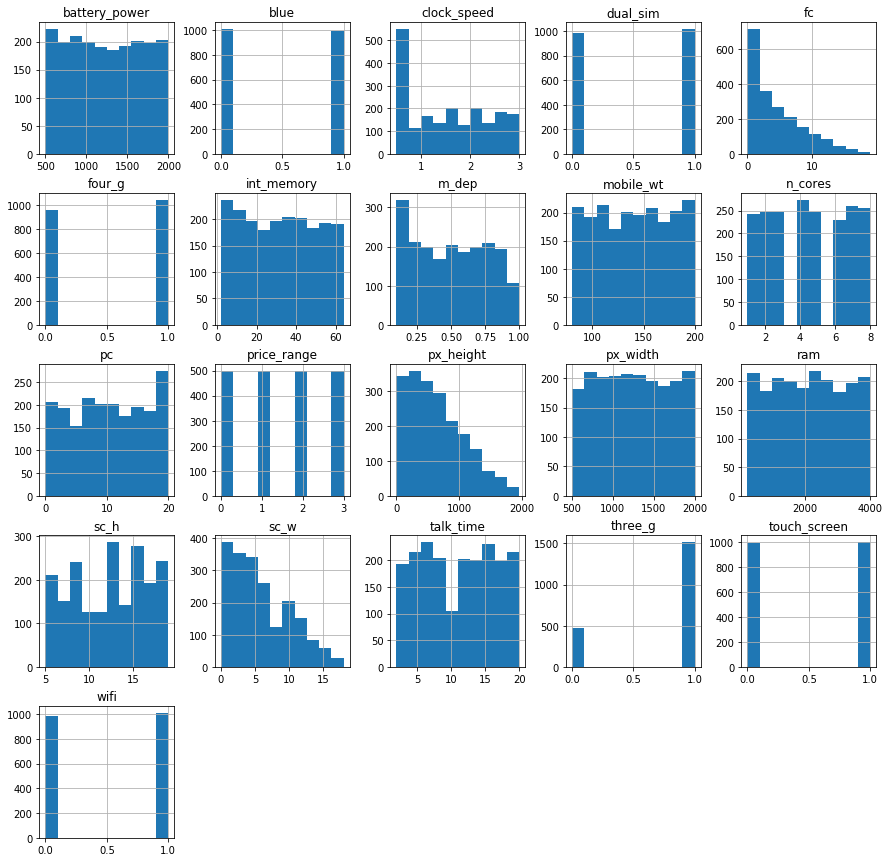

In [5]:
hist = df_base.hist(figsize=(15,15))

* Para el cálculo de frecuencia se las agrupa para cada variable por cada tipo.

In [6]:
for columna in df_base.columns:    
    df_frecuencia_cat=df_base.groupby([columna],as_index=False).size()           
    if len(df_frecuencia_cat)<umbral_categoria:
            print(df_frecuencia_cat)

blue
0    1010
1     990
dtype: int64
dual_sim
0     981
1    1019
dtype: int64
four_g
0     957
1    1043
dtype: int64
n_cores
1    242
2    247
3    246
4    274
5    246
6    230
7    259
8    256
dtype: int64
three_g
0     477
1    1523
dtype: int64
touch_screen
0     994
1    1006
dtype: int64
wifi
0     986
1    1014
dtype: int64
price_range
0    500
1    500
2    500
3    500
dtype: int64


##	4. Hallar todas las correlaciones existentes entre las variables numéricas del conjunto de datos.
* Se utiliza la función de correlación de las variables, en donde un mejor modelo debe considerar aquellas variables más correladas con la variable a estimar y aquellas variables más decorrelladas entre sí. Aclarar que esto dependerá del método de aprendizaje que utilicemos.

In [7]:
mat_corre = df_base.corr()
display(mat_corre)

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
battery_power,1.000000,0.011252,0.011482,-0.041847,0.033334,0.015665,-0.004004,0.034085,0.001844,-0.029727,0.031441,0.014901,-0.008402,-0.000653,-0.029959,-0.021421,0.052510,0.011522,-0.010516,-0.008343,0.200723
blue,0.011252,1.000000,0.021419,0.035198,0.003593,0.013443,0.041177,0.004049,-0.008605,0.036161,-0.009952,-0.006872,-0.041533,0.026351,-0.002952,0.000613,0.013934,-0.030236,0.010061,-0.021863,0.020573
clock_speed,0.011482,0.021419,1.000000,-0.001315,-0.000434,-0.043073,0.006545,-0.014364,0.012350,-0.005724,-0.005245,-0.014523,-0.009476,0.003443,-0.029078,-0.007378,-0.011432,-0.046433,0.019756,-0.024471,-0.006606
dual_sim,-0.041847,0.035198,-0.001315,1.000000,-0.029123,0.003187,-0.015679,-0.022142,-0.008979,-0.024658,-0.017143,-0.020875,0.014291,0.041072,-0.011949,-0.016666,-0.039404,-0.014008,-0.017117,0.022740,0.017444
fc,0.033334,0.003593,-0.000434,-0.029123,1.000000,-0.016560,-0.029133,-0.001791,0.023618,-0.013356,0.644595,-0.009990,-0.005176,0.015099,-0.011014,-0.012373,-0.006829,0.001793,-0.014828,0.020085,0.021998
four_g,0.015665,0.013443,-0.043073,0.003187,-0.016560,1.000000,0.008690,-0.001823,-0.016537,-0.029706,-0.005598,-0.019236,0.007448,0.007313,0.027166,0.037005,-0.046628,0.584246,0.016758,-0.017620,0.014772
int_memory,-0.004004,0.041177,0.006545,-0.015679,-0.029133,0.008690,1.000000,0.006886,-0.034214,-0.028310,-0.033273,0.010441,-0.008335,0.032813,0.037771,0.011731,-0.002790,-0.009366,-0.026999,0.006993,0.044435
m_dep,0.034085,0.004049,-0.014364,-0.022142,-0.001791,-0.001823,0.006886,1.000000,0.021756,-0.003504,0.026282,0.025263,0.023566,-0.009434,-0.025348,-0.018388,0.017003,-0.012065,-0.002638,-0.028353,0.000853
mobile_wt,0.001844,-0.008605,0.012350,-0.008979,0.023618,-0.016537,-0.034214,0.021756,1.000000,-0.018989,0.018844,0.000939,0.000090,-0.002581,-0.033855,-0.020761,0.006209,0.001551,-0.014368,-0.000409,-0.030302
n_cores,-0.029727,0.036161,-0.005724,-0.024658,-0.013356,-0.029706,-0.028310,-0.003504,-0.018989,1.000000,-0.001193,-0.006872,0.024480,0.004868,-0.000315,0.025826,0.013148,-0.014733,0.023774,-0.009964,0.004399


Analisis de correlaciones existentes entre las variables numéricas del conjunto de datos.

* Como se puede observar existe una relación las variables ram y price range existe una alta correlación y generalmente en los modelos se busca variables curreladas con respecto a la variable objetivo y decorreladas entre sí. En este caso implica que el dispositivo móvil sea más costoso.
Ahora **no se puede presumir** que entre fc y pc exista una alta correlación, pero puede influir sobre los modelos. Si luego del análisis de las métricas se observa efectos no deseados se puede presumir que la inclusión de estas variables pudo afectar el modelo.
Para predicciones basadas en regresión generalmente se debe enfrentar problemas de **multicolinealidad** en estos casos los coeficientes pueden basarse en otras variables del modelo. Los coeficientes se vuelven muy sensibles a los cambios.

In [8]:
df_cols = mat_corre.stack().reset_index()
df_cols.columns = ['VariableA','VariableB','correlation']
df_corr = df_cols[(df_cols['correlation']>umbral_correlacion)&(df_cols['correlation']!=1)]
display(df_corr)

,VariableA,VariableB,correlation
94,fc,pc,0.644595
214,pc,fc,0.644595
293,ram,price_range,0.917046
433,price_range,ram,0.917046


**Nota:** La covarianza puede ser un número muy grande. Por tanto, es mejor expresarla de forma normalizada en rangos de valores entre -1 y 1, este proceso de normalización nos ayuda a obtener un coeficiente que se llama coeficiente de correlación y por eso se realizó el análisis anterior utilizando este.

## 5. Determinar el conjunto de modelización y el de validación
* Para determinar el conjunto de modelización se realizara sobre todo el conjunto de variables. Se separa la columna a predecir rango de precios(price_range).

In [9]:
columnas_x=df_base.columns.difference(['price_range'])
X=df_base[columnas_x]
Y=df_base['price_range']

* Se segmenta los datos en dos conjuntos uno de entrenamiento con el 80% y de prueba 20% del total de datos respectivamente.

In [10]:
train_x,test_x,train_y,test_y=train_test_split(X,Y,test_size=0.2, random_state = semilla_aleatoria)

## 6. Pasos clasificación método vector de soporte 

### Parametrización del algoritmo de clasificación

In [11]:
class_svm = svm.SVC(random_state=semilla_aleatoria)
class_svm.fit(train_x,train_y)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=1234, shrinking=True,
    tol=0.001, verbose=False)

### Predicción del modelo.

In [12]:
predEY_class_svm=class_svm.predict(test_x)

### Métricas.

In [13]:
display(confusion_matrix(test_y,predEY_class_svm))
class_report=classification_report(test_y,predEY_class_svm)
print(class_report)

array([[ 93,   0,   0,   0],
       [  4,  93,   5,   0],
       [  0,   5,  86,   7],
       [  0,   0,   3, 104]], dtype=int64)

              precision    recall  f1-score   support

           0       0.96      1.00      0.98        93
           1       0.95      0.91      0.93       102
           2       0.91      0.88      0.90        98
           3       0.94      0.97      0.95       107

    accuracy                           0.94       400
   macro avg       0.94      0.94      0.94       400
weighted avg       0.94      0.94      0.94       400



### Validación cruzada accuracy score con mínimo 5 folds.

In [14]:
def graficar_accuracy_scores(estimator, train_x, train_y,test_x,test_y,nparts=5,jobs=None):
    kfold = KFold(n_splits=nparts,shuffle=True, random_state=semilla_aleatoria)
    fig,axes = plt.subplots(figsize=(7, 3))
    axes.set_title("Ratio de éxito(Accuracy)/Nro. Fold")
    axes.set_xlabel("Nro. Fold")
    axes.set_ylabel("Accuracy")    
    train_scores = cross_val_score(estimator, train_x,train_y, cv = kfold, n_jobs=jobs, scoring="accuracy")
    test_scores = cross_val_score(estimator, test_x, test_y, cv = kfold, n_jobs=jobs, scoring="accuracy")        
    train_sizes = range(1,nparts+1,1)    
    axes.grid()    
    axes.plot(train_sizes, train_scores, 'o-', color="r",label="Datos Entrenamiento")
    axes.plot(train_sizes, test_scores, 'o-', color="g",label="Validacion Cruzada")
    axes.legend(loc="best")
    return train_scores

array([0.9625  , 0.959375, 0.94375 , 0.946875, 0.95625 ])

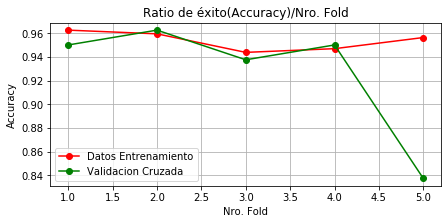

In [15]:
graficar_accuracy_scores(class_svm,train_x,train_y,test_x,test_y,nparts=5,jobs=2)

## 7. Pasos clasificación método redes de neuronas

### Parametrización del algoritmo de clasificación

In [16]:
class_mlp = MLPClassifier(hidden_layer_sizes=(10,10,10),max_iter=1500, random_state=semilla_aleatoria)
class_mlp.fit(train_x,train_y)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(10, 10, 10), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=1500,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=1234, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

### Predicción del modelo.

In [17]:
predEY_class_mlp = class_mlp.predict(test_x)

### Métricas.

In [18]:
display(confusion_matrix(test_y,predEY_class_mlp))
class_report=classification_report(test_y,predEY_class_mlp)
print(class_report)

array([[ 61,  22,  10,   0],
       [ 20,  19,  49,  14],
       [  0,   4,  50,  44],
       [  0,   0,   5, 102]], dtype=int64)

              precision    recall  f1-score   support

           0       0.75      0.66      0.70        93
           1       0.42      0.19      0.26       102
           2       0.44      0.51      0.47        98
           3       0.64      0.95      0.76       107

    accuracy                           0.58       400
   macro avg       0.56      0.58      0.55       400
weighted avg       0.56      0.58      0.55       400



### Validación cruzada accuracy score con mínimo 5 folds.

array([0.609375, 0.565625, 0.553125, 0.646875, 0.54375 ])

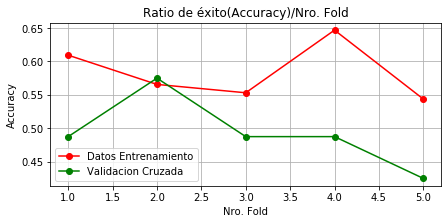

In [19]:
graficar_accuracy_scores(class_mlp,train_x,train_y,test_x,test_y,nparts=5,jobs=2)

## 8. Análisis con datos normalizados

* Para este caso se utilizará la normalización **StandardScaler** el cual está representado por la formula z = (x - u) / s.

In [20]:
X_escaler = StandardScaler().fit(X).transform(X.astype(float))

* Se segmenta los datos en dos conjuntos uno de entrenamiento con el 80% y de prueba 20% del total de datos respectivamente.

In [21]:
train_x,test_x,train_y,test_y=train_test_split(X_escaler,Y,test_size=0.2, random_state = semilla_aleatoria)

## 9. Pasos clasificación método vector de soporte con datos normalizados

In [22]:
class_svm_sc = svm.SVC(random_state=semilla_aleatoria)
class_svm_sc.fit(train_x,train_y)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=1234, shrinking=True,
    tol=0.001, verbose=False)

### Predicción del modelo.

In [23]:
predEY_class_svm=class_svm_sc.predict(test_x)

### Métricas.

In [24]:
display(confusion_matrix(test_y,predEY_class_svm))
class_report=classification_report(test_y,predEY_class_svm)
print(class_report)

array([[86,  7,  0,  0],
       [ 5, 83, 14,  0],
       [ 0, 13, 81,  4],
       [ 0,  0, 10, 97]], dtype=int64)

              precision    recall  f1-score   support

           0       0.95      0.92      0.93        93
           1       0.81      0.81      0.81       102
           2       0.77      0.83      0.80        98
           3       0.96      0.91      0.93       107

    accuracy                           0.87       400
   macro avg       0.87      0.87      0.87       400
weighted avg       0.87      0.87      0.87       400



### Validación cruzada accuracy score con mínimo 5 folds.

array([0.884375, 0.871875, 0.853125, 0.859375, 0.871875])

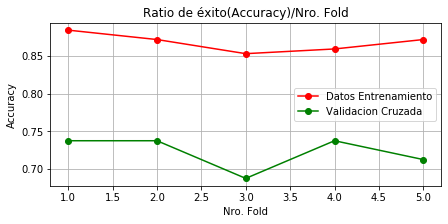

In [25]:
graficar_accuracy_scores(class_svm_sc,train_x,train_y,test_x,test_y,nparts=5,jobs=2)

## 10. Pasos clasificación método redes de neuronas con datos normalizados

### Parametrización del algoritmo de clasificación

In [26]:
class_mlp_sc = MLPClassifier(hidden_layer_sizes=(10,10,10),max_iter=1500, random_state=semilla_aleatoria)
class_mlp_sc.fit(train_x,train_y)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(10, 10, 10), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=1500,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=1234, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

### Predicción del modelo.

In [27]:
predEY_class_mlp = class_mlp_sc.predict(test_x)

### Métricas.

In [28]:
display(confusion_matrix(test_y,predEY_class_mlp))
class_report=classification_report(test_y,predEY_class_mlp)
print(class_report)

array([[ 88,   5,   0,   0],
       [  4,  91,   7,   0],
       [  0,   5,  90,   3],
       [  0,   0,   3, 104]], dtype=int64)

              precision    recall  f1-score   support

           0       0.96      0.95      0.95        93
           1       0.90      0.89      0.90       102
           2       0.90      0.92      0.91        98
           3       0.97      0.97      0.97       107

    accuracy                           0.93       400
   macro avg       0.93      0.93      0.93       400
weighted avg       0.93      0.93      0.93       400



### Validación cruzada accuracy score con mínimo 5 folds.

array([0.9     , 0.9     , 0.9125  , 0.903125, 0.934375])

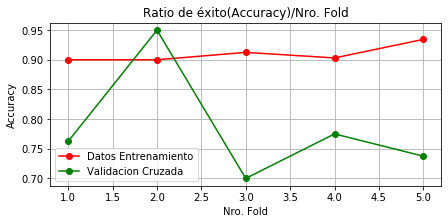

In [29]:
graficar_accuracy_scores(class_mlp_sc,train_x,train_y,test_x,test_y,nparts=5,jobs=2)

## 11. Análisis con datos normalizados y columnas(binarias) categóricas

* Para la variable a predecir se agrega una columna binaria para cada categoría y devuelve una matriz dispersa utilizando **OneHotEncoder**.

In [30]:
enc = OneHotEncoder(sparse=False)
Y_hot_encoder = enc.fit_transform(df_base[['price_range']])

* Se segmenta los datos en dos conjuntos uno de entrenamiento con el 80% y de prueba 20% del total de datos respectivamente.

In [31]:
train_x,test_x,train_y,test_y=train_test_split(X_escaler,Y_hot_encoder,test_size=0.2, random_state = semilla_aleatoria)

## 12. Pasos clasificación método redes de neuronas con datos normalizados y columnas(binarias) categóricas

### Parametrización del algoritmo de clasificación.

In [32]:
class_mlp_os = MLPClassifier(hidden_layer_sizes=[20]*4,max_iter=1500, random_state=semilla_aleatoria)
class_mlp_os.fit(train_x,train_y)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=[20, 20, 20, 20], learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=1500,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=1234, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

### Predicción del modelo.

In [33]:
predEY_class_mlp = class_mlp_os.predict(test_x)
display(predEY_class_mlp)

array([[0, 1, 0, 0],
       [0, 0, 1, 0],
       [0, 0, 1, 0],
       ...,
       [1, 0, 0, 0],
       [0, 0, 0, 1],
       [1, 0, 0, 0]])

### Métricas.

In [34]:
inv_y = enc.inverse_transform(test_y)
inv_ey = enc.inverse_transform(predEY_class_mlp)
display(confusion_matrix(inv_y,inv_ey))
class_report=classification_report(inv_y,inv_ey)
print(class_report)

array([[ 88,   5,   0,   0],
       [ 10,  84,   8,   0],
       [  0,   3,  89,   6],
       [  0,   0,   5, 102]], dtype=int64)

              precision    recall  f1-score   support

           0       0.90      0.95      0.92        93
           1       0.91      0.82      0.87       102
           2       0.87      0.91      0.89        98
           3       0.94      0.95      0.95       107

    accuracy                           0.91       400
   macro avg       0.91      0.91      0.91       400
weighted avg       0.91      0.91      0.91       400



### Validación cruzada accuracy score con mínimo 5 folds.

array([0.8875  , 0.90625 , 0.890625, 0.8625  , 0.890625])

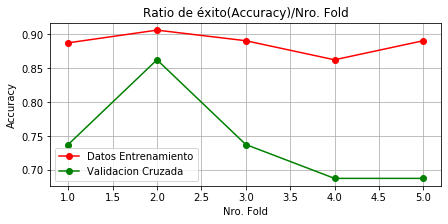

In [35]:
graficar_accuracy_scores(class_mlp_os,train_x,train_y,test_x,test_y,nparts=5,jobs=2)

## 13. Comentar los resultados obtenidos en la matriz de confusión de cada uno de los modelos. ¿Cuáles son las ventajas y las desventajas de cada uno de los modelos? ¿Cuál es el mejor modelo? Justifique su respuesta.  

<h3>Resultados matrices de confusión:</h3>
<ul>
<li> Para las funciones de clasificación la matriz de confusión, cuyos valores son métricas de las estimaciones, en este caso difieren en el valor de ratio de éxito mayor y el valor f1, es por eso que se realizó dos modelos adicionales basados en re-escalar los datos y en la inclusión de multi-clases. Sin embargo, para el modelo de redes neuronales durante el proceso de validación cruzada se puede observar un comportamiento atípico frente a otros modelos de clasificación, ya que los valores de ratio de éxito están bajo en 60%.
</li>
<li>Una vez normalizados los datos se observa un mejor comportamiento de las redes de neuronas al realizar la estimación sobre los valores a predecir. Sin embargo, para la SVM la ratio de éxito se redujo luego de la aplicación.</li>
<li>Finalmente para el caso en el que se utilizó un esquema muiti-clase separando las categorías de la variable a predecir como columnas binaras, y en conjunto con la normalización de datos se obtuvo una ratio de éxito análogo al anterior.</li>
</ul>
<h3>¿Cuál es el mejor modelo?</h3>
El mejor método para clasificar en este conjunto de datos es el basado en SVM ya que en el proceso de validación cruzada sobre los conjuntos de entrenamiento y test respectivamente, mantienen un ratio de éxito sobre el 85%. Adicionalmente, respecto de la cantidad de datos es más óptimo en el tiempo de respuesta y procesamiento. Finalmente, como se observa muy pocas variables están correladas y por eso sus métricas son buenas; incluso sin normalizar los datos previamente.


<h3>Vector de soporte:</h3>
<table>
<thead>
<tr>
<th>Ventajas</th>
<th>Desventajas</th>
</tr>
</thead>
<tbody>
<tr><td>* Funcionan bien cuando existe una alta de-correlación entre las clases. Por ejemplo, con data no estructura o semi-estructurada por ejemplo textos, imagines entre otros.</td><td>*Busca el mejor modelo requiere probar diferentes combinaciones de Kernels y parámetros.</td></tr>
<tr><td>* Es más efectiva cuando existen más variables que datos.</td><td>* Se trata de un modelo de caja negra difícil y/o imposible de interpretar.</td></tr>
<tr><td>* Es eficiente respecto del consumo de memoria. Generalmente comparada con redes de neuronas ofrece mejores resultados.</td><td>* En ocasiones puede llevar a un problema del sobreajuste debido a la selección del modelo.</td></tr>    
</tbody>
</table>

<h3>Redes de neuronas:</h3>
<table>
<thead>
<tr>
<th>Ventajas</th>
<th>Desventajas</th>
</tr>
</thead>
<tbody>
<tr><td>* Son adaptables para diferentes campos del aprendizaje automático. Por ejemplo regresión, clasificación, métodos no supervisados entre otros.</td><td>* Mayor tiempo de ejecución. Por tanto computacionalmente costosas.</td></tr>
<tr><td>* Modelos muy precisos. Las redes neuronales aprenden a través de eventos y realizan decisiones relacionándolos.</td><td>* No hay una regla para determinar una mayor estructura para resolver un problema. La estimación de una estructura adecuada se la consigue generalmente a través de métodos prueba y erros y se basan en la experiencia de los datos.</td></tr>
<tr><td>* Son tolerantes a fallos ya que la corrupción de una de sus neuronas (en caso de tener una gran cantidad de ellas), permite que se siga realizando el proceso de estimación.</td><td>* La cantidad de neuronas depende más de una capacidad de procesamiento que del problema en si. Es decir que problemas muy complejos bajo alto coste de infraestructura ya que estas requieren procesadores en paralelo.</td></tr>    
</tbody>
</table>

## Referencias Bibliográficas

* Intellipaat Community. (s. f.). Advantages and disadvantages of neural networks—Intellipaat Community. Recuperado 6 de junio de 2020, de https://intellipaat.com/community/21886/advantages-and-disadvantages-of-neural-networks
* A Beginner’s Guide to Neural Networks in Python | Springboard Blog. (s. f.). Recuperado 3 de junio de 2020, de https://www.springboard.com/blog/beginners-guide-neural-network-in-python-scikit-learn-0-18/
* How to build your own Neural Network from scratch in Python. (s. f.). Recuperado 1 de junio de 2020, de https://towardsdatascience.com/how-to-build-your-own-neural-network-from-scratch-in-python-68998a08e4f6
* Top 4 advantages and disadvantages of Support Vector Machine or SVM. (s. f.). Recuperado 30 de mayo de 2020, de https://medium.com/@dhiraj8899/top-4-advantages-and-disadvantages-of-support-vector-machine-or-svm-a3c06a2b107
